### Descriptive Analytics 

     Working with DataFrames


Loading the dataset onto a DataFrame


In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import statsmodels.api as sm
pd.set_option('display.float_format', lambda x: '%.3f' % x) 

In [2]:
df_ipl_auction_data = pd.read_csv( 'IPLData.csv' ) 

In [3]:
df_ipl_auction_data

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.000,...,0.000,0,307,15,20.470,8.900,13.930,2009,50000,50000
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.410,...,0.000,0,29,0,0.000,14.500,0.000,2008,50000,50000
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.620,...,121.010,5,1059,29,36.520,8.810,24.900,2008,200000,350000
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.560,...,76.320,0,1125,49,22.960,6.230,22.140,2011,100000,850000
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.930,...,120.710,28,0,0,0.000,0.000,0.000,2011,100000,800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,126,"Yadav, AS",2,IND,DC,Batsman,0,0,0,0.000,...,125.640,2,0,0,0.000,0.000,0.000,2010,50000,750000
126,127,Younis Khan,2,PAK,RR,Batsman,6398,7,6814,75.780,...,42.850,0,0,0,0.000,0.000,0.000,2008,225000,225000
127,128,Yuvraj Singh,2,IND,KXIP+,Batsman,1775,9,8051,87.580,...,131.880,67,569,23,24.740,7.020,21.130,2011,400000,1800000
128,129,Zaheer Khan,2,IND,MI+,Bowler,1114,288,790,73.550,...,91.670,1,1783,65,27.430,7.750,21.260,2008,200000,450000


# Cross tab analysis, Proportions Test, chi-square test & p-value

Chi-square Test: The chi-square test is used to determine whether there is a significant association between two categorical variables. It can be performed using the chi2_contingency() function from the SciPy library.

Proportions Test: The proportions test is used to determine whether there is a significant difference between the proportions of two categorical variables. It can be performed using the proportions_ztest() function from the StatsModels library.

In [6]:
def cat_bivar_dist(df, var_1, var_2, val=None):
    if val==None:
        ctab = pd.crosstab(df[var_1], df[var_2])
        print(ctab)
        # Chi-square test & p-value
        chi2, p, dof, expected = chi2_contingency(ctab)
        print('Chi-square statistic:', chi2)
        print('p-value:', p)
    else:
        # Proportion Test
        # Calculate the proportions
        prop_var_1_var_2 = df.groupby(var_1)[var_2].apply(lambda x: x.eq(val).mean())

        # Perform the proportions test
        zscore, pvalue = sm.stats.proportions_ztest(prop_var_1_var_2, nobs=df[var_1].value_counts())
        print('Z-score:', zscore)
        print('p-value:', pvalue)

    return

# Summary Statistics, Dataframe info & shape 

In [7]:
def ipl_auction_data_summary_stats(df):
    try:
        df.info()
        # print the summary statistics
        print(df.describe())
        print(f'Shape of the Dataset is {df.shape}')
    except:
        print('Not a dataframe')
    

# Plot univariate distribution

Univariable analysis for Categorical variables

In [20]:
def plt_cat_univar_dist(var_1,df):  
    
    # Counterplot of categorical variable
    # Count Plot: This plot is similar to a bar plot, but it shows the count of observations in each categorical bin using bars.
    sns.set(style="darkgrid")
    ax = sns.countplot(x=var_1, data=df)
    plt.show()
    
    # Histogram plot
    sns.histplot(data=df, x=var_1, kde=True)
    plt.show()    
    
    return

Univariate analysis for numrical variables

In [21]:
def plt_num_univar_dist(var_1,df):
    
    if df[var_1].dtype=='int64':
        # Box plot
        sns.boxplot(data=df, y=var_1)
        plt.show()

        # Violin plot
        sns.violinplot(data=df, y=var_1)
        plt.show()

        # Density plot
        sns.kdeplot(data=df, x=var_1)
        plt.show()

Univariate analysis for continuous variables

In [24]:
def plt_cont_univar_dist(df):

    # calculate the mean and standard deviation
    mean = df.mean()
    std_dev = df.std()

    # plot a histogram
    plt.hist(df, bins=10)
    plt.title('Histogram of Your Data')
    plt.xlabel('Variable Name')
    plt.ylabel('Frequency')
    plt.show()

    # plot a box plot
    plt.boxplot(data)
    plt.title('Boxplot of Your Data')
    plt.xlabel('Variable Name')
    plt.show()

    # calculate the skewness and kurtosis
    skewness = df.skew()
    kurtosis = df.kurtosis()

    # print the results
    print("Mean: ", mean)
    print("Standard Deviation: ", std_dev)
    print("Skewness: ", skewness)
    print("Kurtosis: ", kurtosis)


# Plot bivariate distribution

Bivariate analysis for Categorical Variables

In [10]:
def plt_cat_bivar_dist(df,var_1,var_2,hue_val,plt_type):      
    
    if(plt_type == 'factorplot'):
        sns.set(style="darkgrid")
        tips = sns.load_dataset("tips")
        ax = sns.factorplot(x=f'{var_1}', y=f'{var_2}', hue=hue_val, data=df)
        plt.show()
    elif(plt_type == 'pointplot'):
        sns.set(style="darkgrid")
        ax = sns.pointplot(x=var_1, y=var_2, hue=hue_val, data=df)
        plt.show()
    elif(plt_type == 'violinplot'):
        sns.set(style="darkgrid")
        ax = sns.violinplot(x=var_1, y=var_2, hue=hue_val, data=df, split=True)
        plt.show()
    else:
        print('Wrong Plot argument')
    
    
    return

Bivariate analysis for Numerical Variables

In [17]:
def plt_num_bivar_dist(df,var_1,var_2):
    
    # Plot scatter plot of two numeric variables
    sns.scatterplot(data=df, x=var_1, y=var_2)
    plt.show()

    # Plot heat map of correlation matrix of numeric variables
    corr_matrix = df.corr()
    sns.heatmap(corr_matrix, annot=False)
    plt.show()

    # Plot joint plot of two numeric variables
    sns.jointplot(x=var_1, y=var_2, data=df)
    plt.show()

    # Plot pair plot of all numeric variables
    sns.pairplot(df)
    plt.show()


Bivariate analysis for Continous variables

# Run statistical analysis on columns

In [27]:
def stat_analysis_on_cols(df):
    
    # Identify numeric variables
    numeric_vars = df.select_dtypes(include=[np.number]).columns.tolist()
    print(f'Numeric variables:{numeric_vars}, count={len(numeric_vars)}')
    
    # Univariate analysis
    print("################# UniVariate Analysis Of Numeric Variables ####################")
    for var in numeric_vars:
        plt_num_univar_dist(var,df)
    
    # bivariate analysis
    print("################# Bi Variate Analysis Of Numeric Variables ####################")
    plt_num_bivar_dist(df,'AGE','WKTS')
    
    # Identify categorical variables
    categorical_vars = df.select_dtypes(include=['object']).columns.tolist()
    
    # Identify continuous variables
    continuous_vars = [var for var in numeric_vars if len(df[var].unique()) > 20]
    print(f'Continuous variables:{continuous_vars}, count={len(continuous_vars)}')
    
    # Univariate analysis
    print("################# UniVariate Analysis Of Continous Variables ####################")
    # plt_cont_univar_dist(df)
    
    print("################# UniVariate Analysis Of Categorical Variables ####################")
    for var in categorical_vars:
        if var != 'PLAYER NAME': 
            print(df[var].value_counts())
            plt_cat_univar_dist(var,df)
    
    print("################# Bi Variate Analysis Of Categorical Variables ####################")
    # Run the bivariate distribution 
    cat_bivar_dist(df,'COUNTRY','TEAM')
    
   
    
    return 

Numeric variables:['Sl.NO.', 'AGE', 'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL', 'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL', 'ECON', 'SR-BL', 'AUCTION YEAR', 'BASE PRICE', 'SOLD PRICE'], count=22
################# UniVariate Analysis Of Numeric Variables ####################


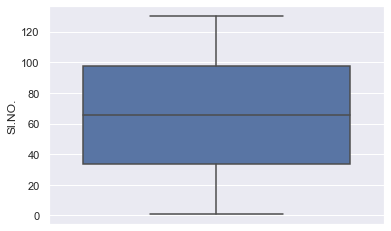

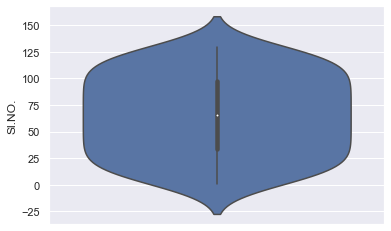

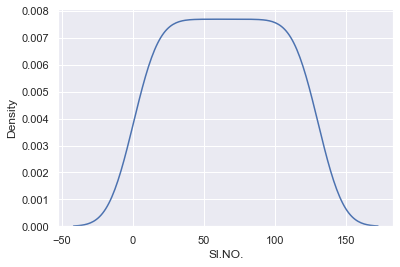

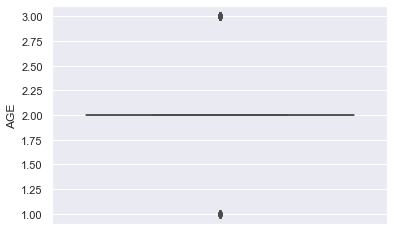

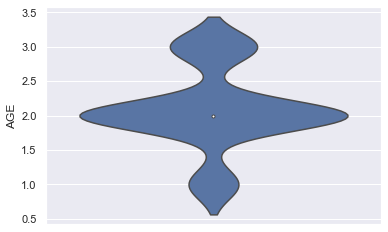

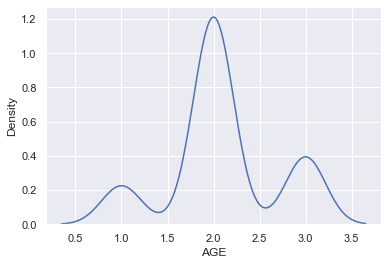

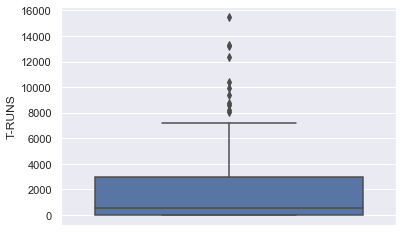

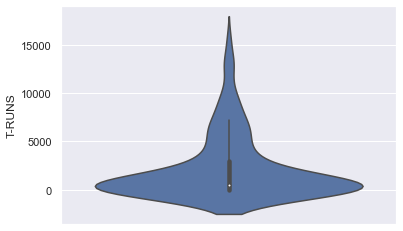

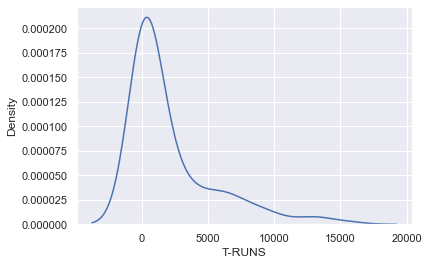

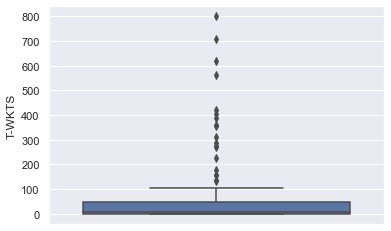

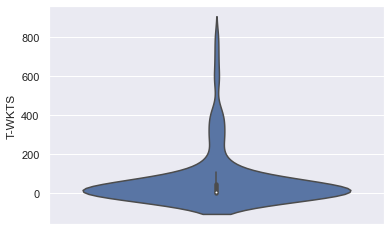

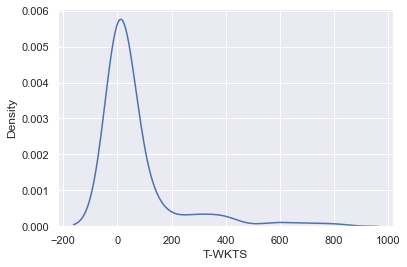

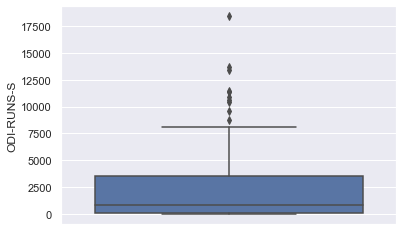

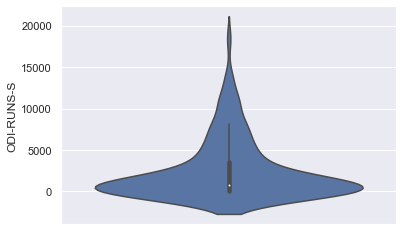

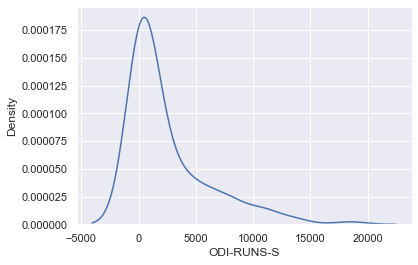

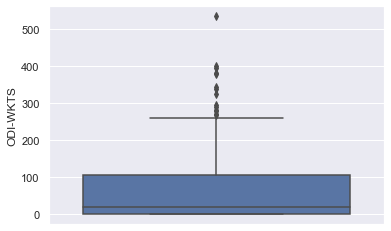

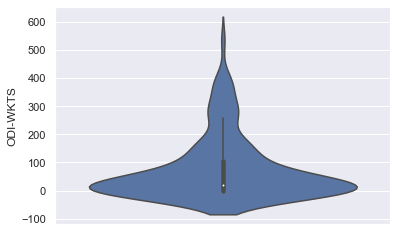

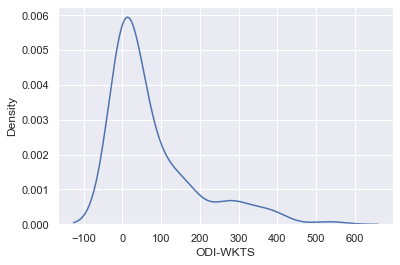

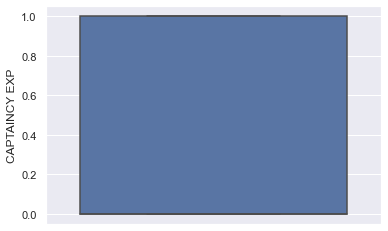

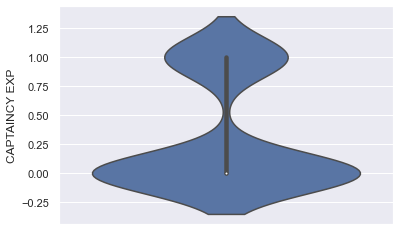

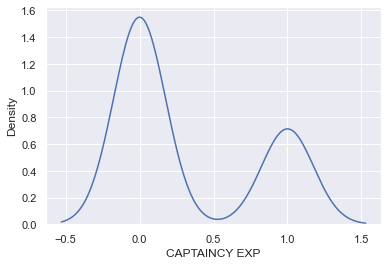

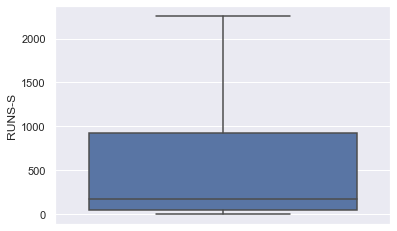

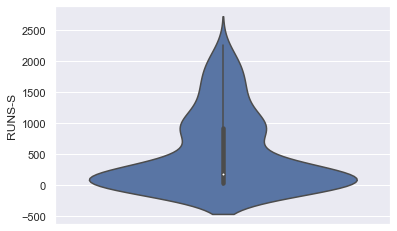

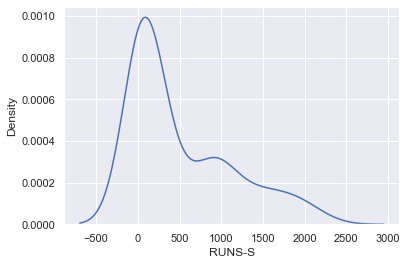

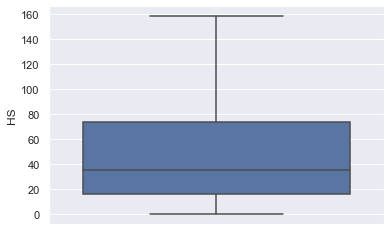

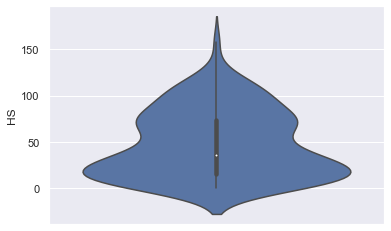

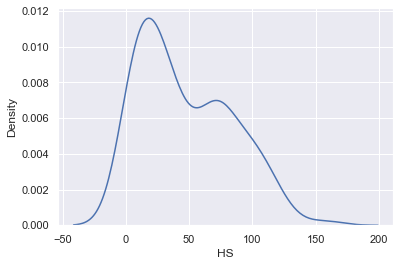

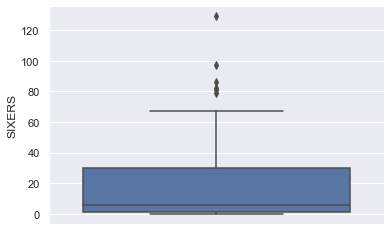

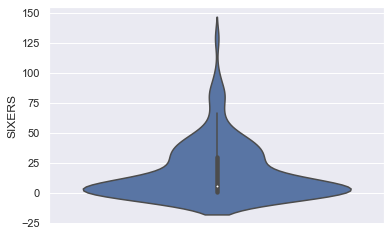

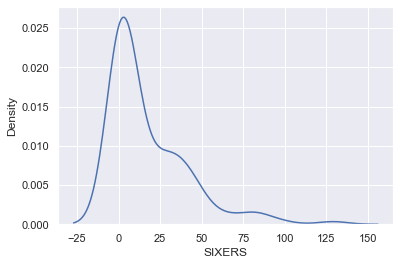

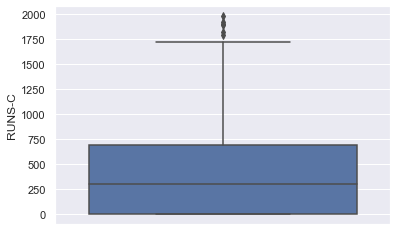

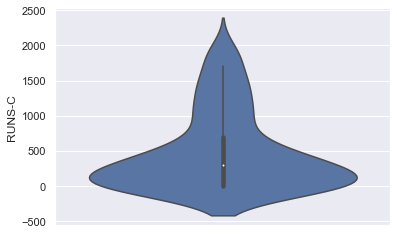

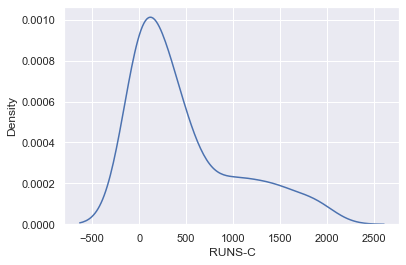

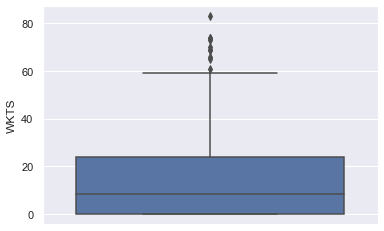

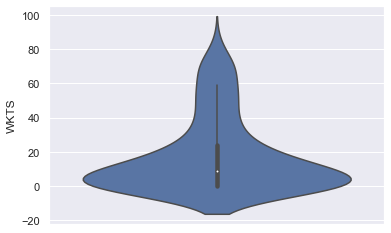

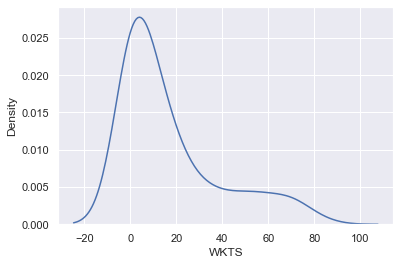

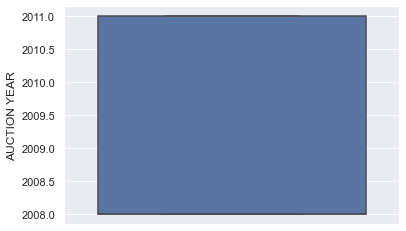

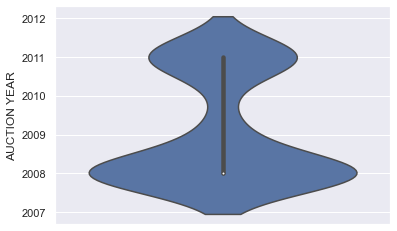

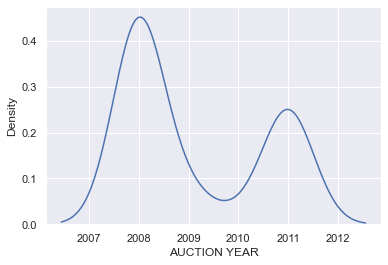

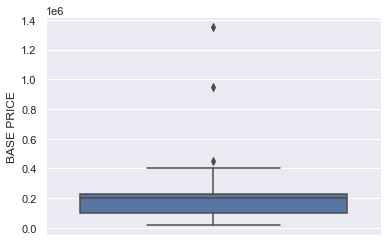

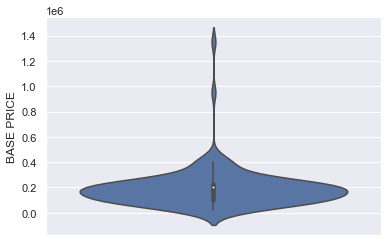

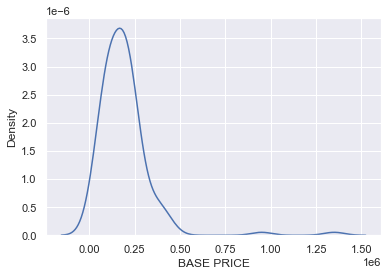

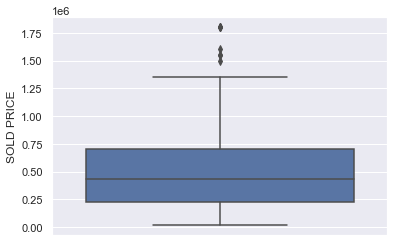

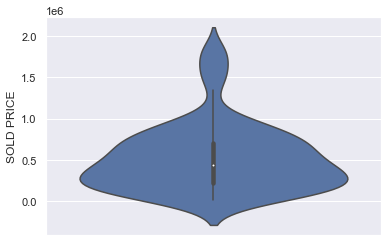

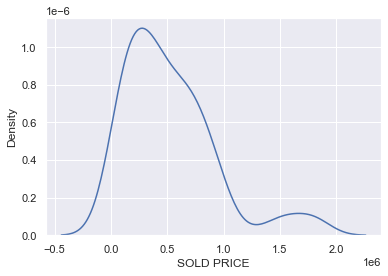

################# Bi Variate Analysis Of Numeric Variables ####################


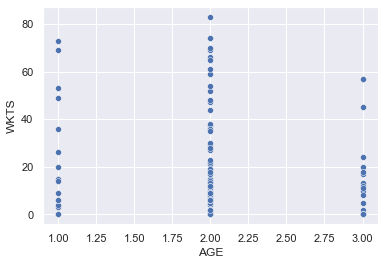

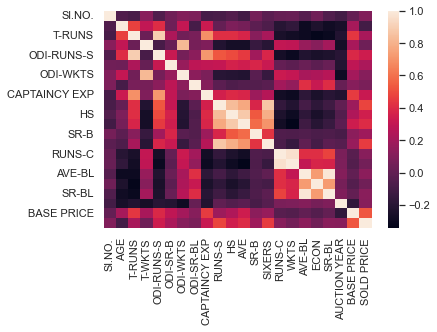

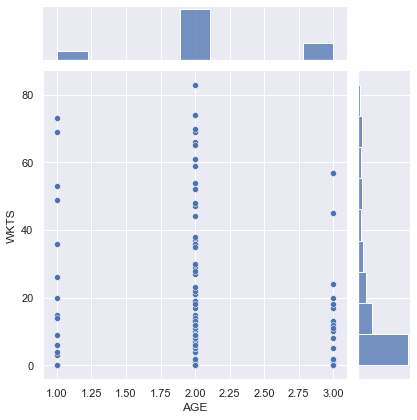

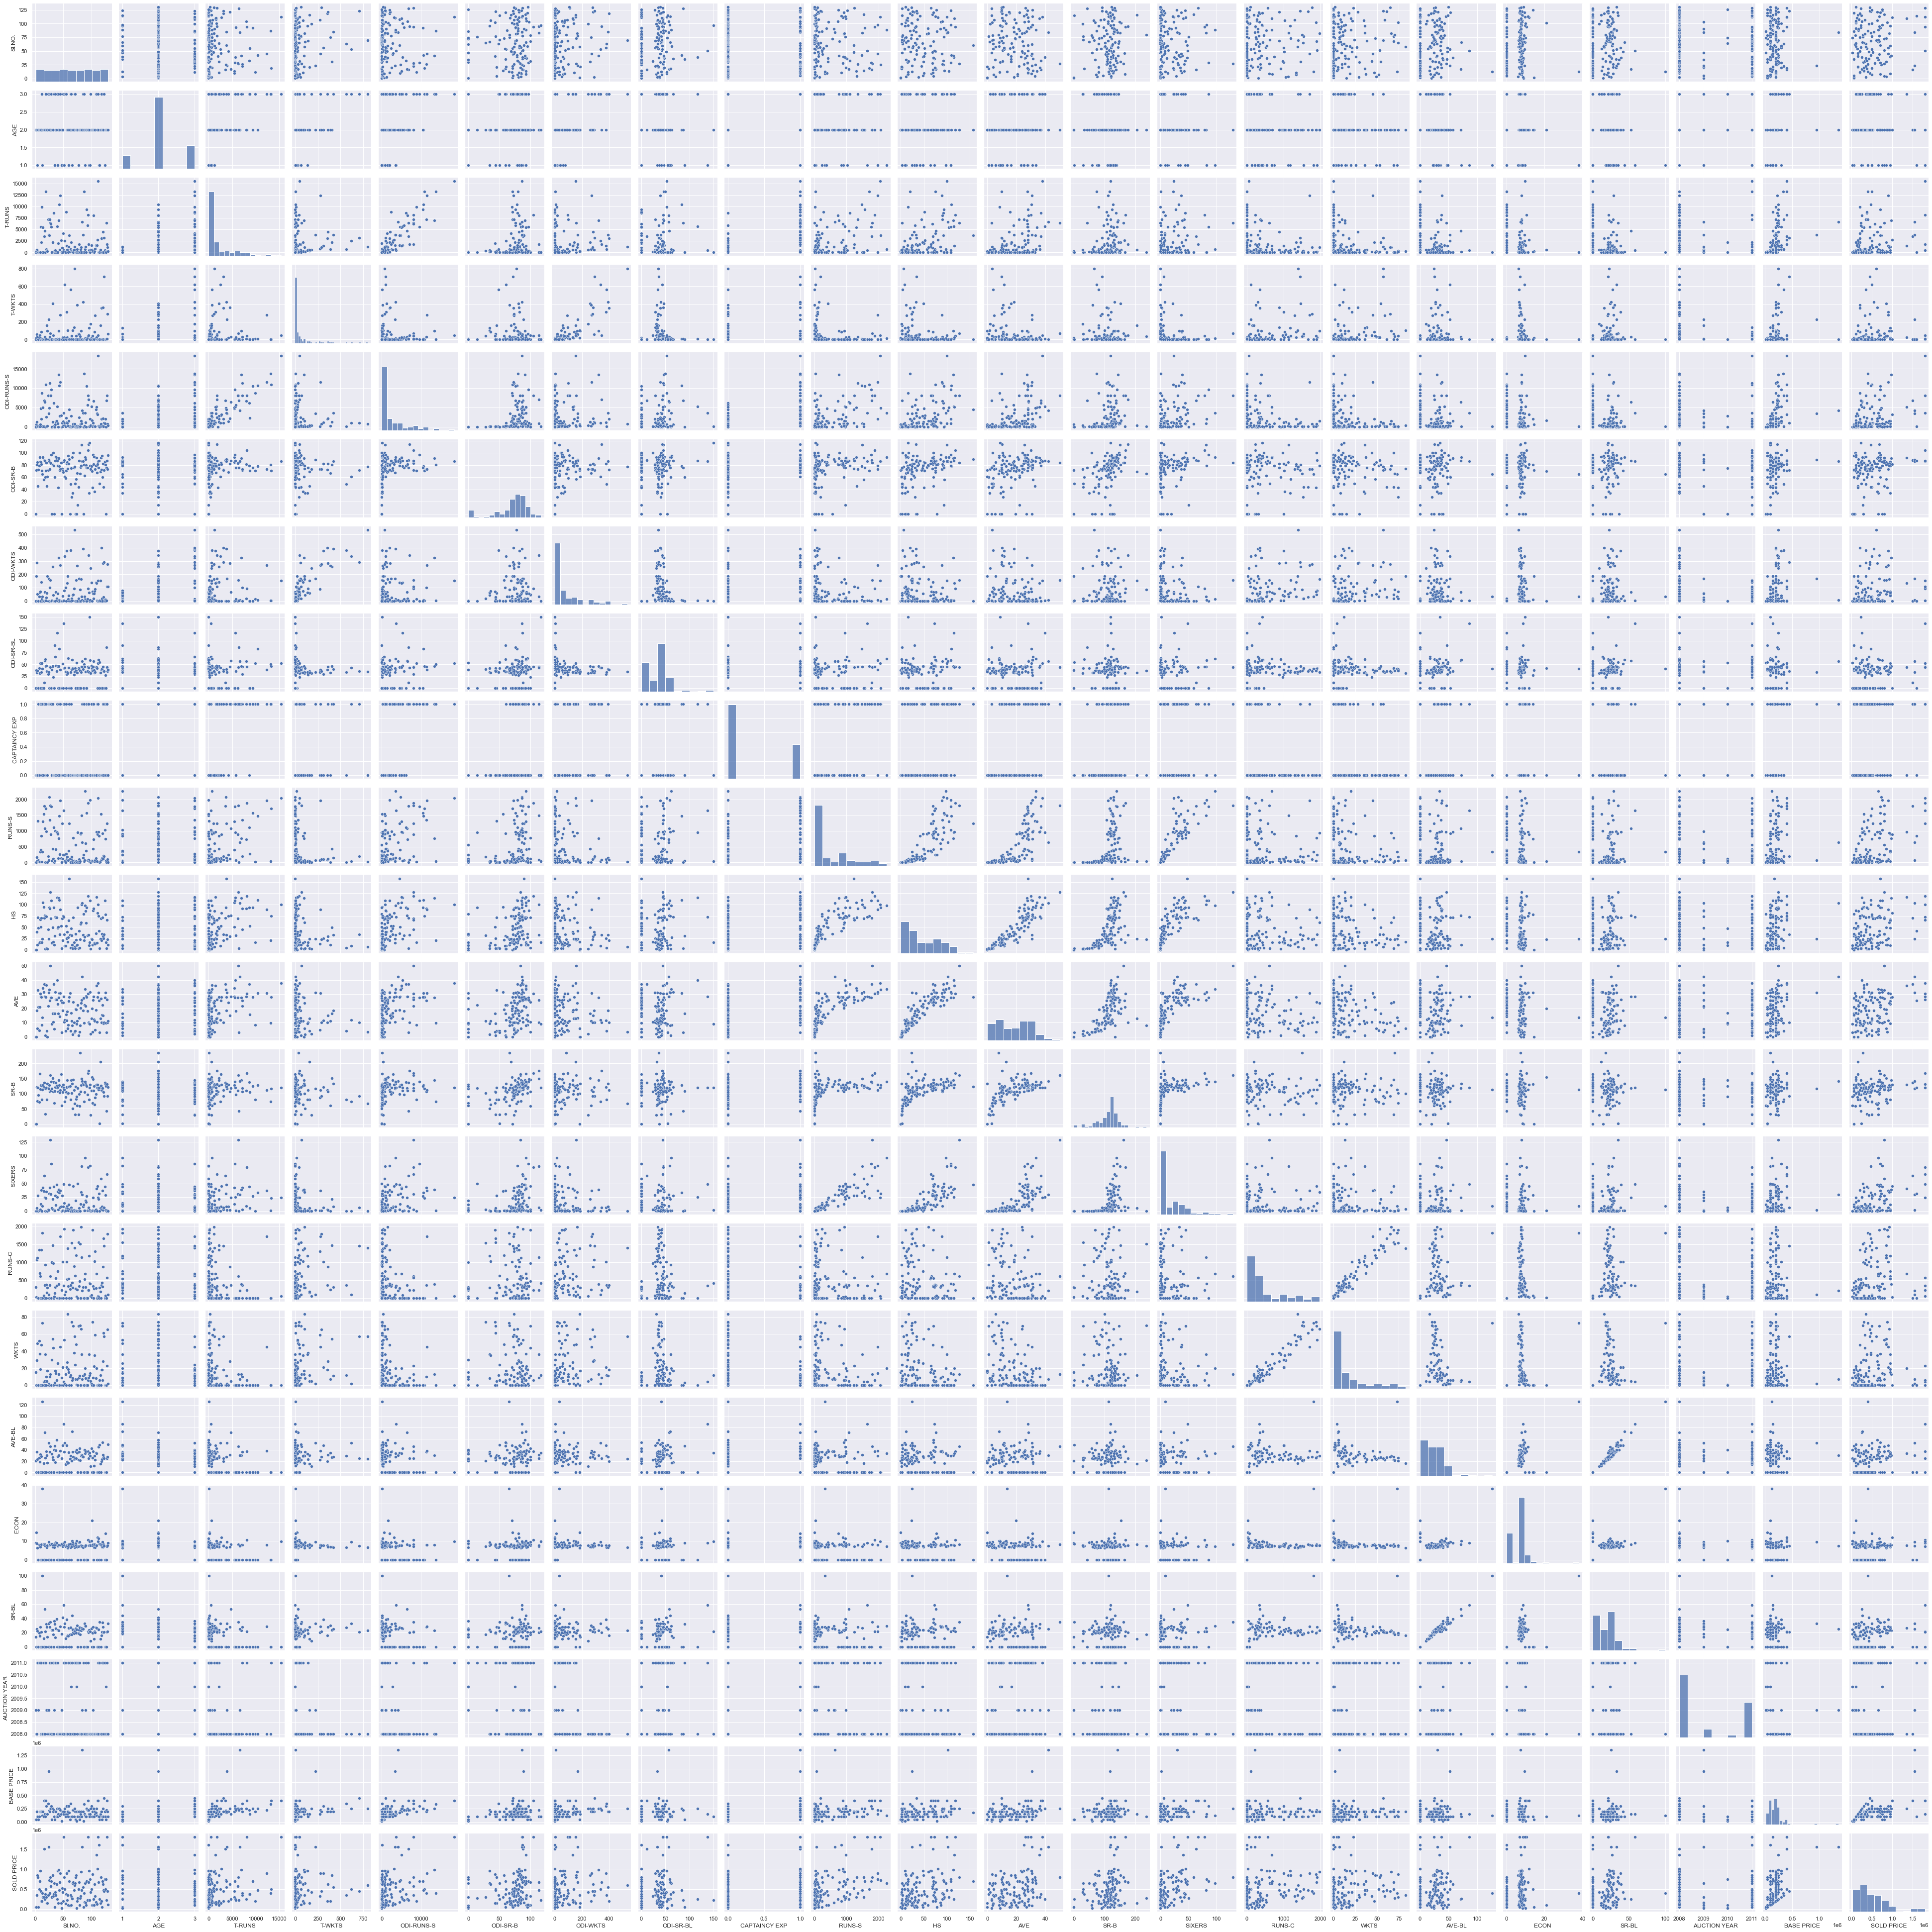

Continuous variables:['Sl.NO.', 'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL', 'ECON', 'SR-BL', 'SOLD PRICE'], count=18
################# UniVariate Analysis Of Continous Variables ####################
################# UniVariate Analysis Of Categorical Variables ####################
IND    53
AUS    22
SA     16
SL     12
PAK     9
NZ      7
WI      6
ENG     3
BAN     1
ZIM     1
Name: COUNTRY, dtype: int64


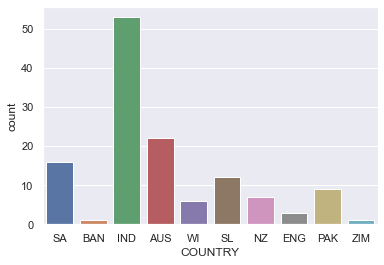

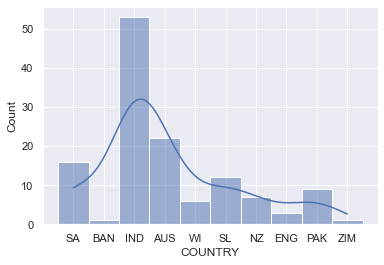

CSK      14
RCB+     12
KKR+     12
DD+      10
DC+      10
RR+       9
RCB       9
DC        7
KXIP+     7
MI        6
DD        6
MI+       6
RR        6
CSK+      5
KKR       5
KXIP      5
KXI+      1
Name: TEAM, dtype: int64


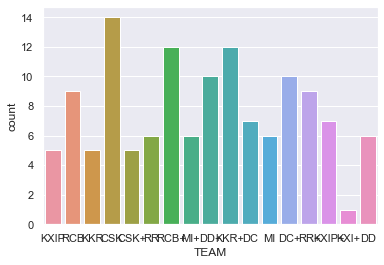

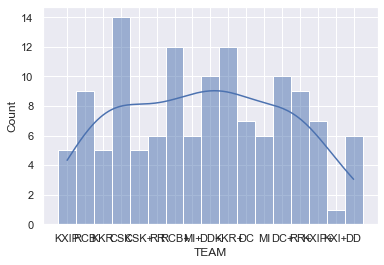

Bowler        44
Batsman       39
Allrounder    35
W. Keeper     12
Name: PLAYING ROLE, dtype: int64


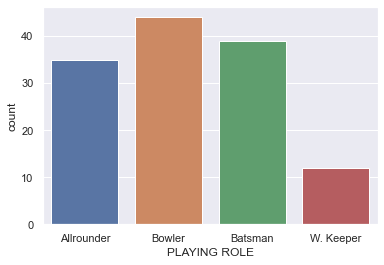

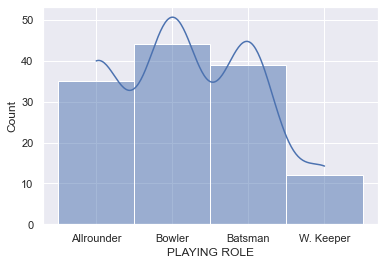

################# Bi Variate Analysis Of Categorical Variables ####################
TEAM     CSK  CSK+  DC  DC+  DD  DD+  KKR  KKR+  KXI+  KXIP  KXIP+  MI  MI+  \
COUNTRY                                                                       
AUS        4     0   0    3   2    2    1     3     1     2      1   0    0   
BAN        0     0   0    0   0    0    0     0     0     0      0   0    0   
ENG        1     0   0    0   0    0    0     0     0     0      0   0    0   
IND        6     3   1    5   1    5    1     5     0     1      4   2    4   
NZ         1     1   0    1   0    1    0     1     0     0      0   0    0   
PAK        0     0   1    0   2    0    2     0     0     0      0   0    0   
SA         2     0   1    0   0    1    0     1     0     1      0   1    1   
SL         0     1   3    0   1    1    0     1     0     0      2   3    0   
WI         0     0   1    1   0    0    0     1     0     1      0   0    1   
ZIM        0     0   0    0   0    0    1     0

In [28]:
stat_analysis_on_cols(df_ipl_auction_data)


In [32]:
#  Slicing and Indexing a dataframe
df_ipl_auction_data[0:5] 

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.000,...,0.000,0,307,15,20.470,8.900,13.930,2009,50000,50000
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.410,...,0.000,0,29,0,0.000,14.500,0.000,2008,50000,50000
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.620,...,121.010,5,1059,29,36.520,8.810,24.900,2008,200000,350000
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.560,...,76.320,0,1125,49,22.960,6.230,22.140,2011,100000,850000
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.930,...,120.710,28,0,0,0.000,0.000,0.000,2011,100000,800000


In [33]:
df_ipl_auction_data[-5:]

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
125,126,"Yadav, AS",2,IND,DC,Batsman,0,0,0,0.000,...,125.640,2,0,0,0.000,0.000,0.000,2010,50000,750000
126,127,Younis Khan,2,PAK,RR,Batsman,6398,7,6814,75.780,...,42.850,0,0,0,0.000,0.000,0.000,2008,225000,225000
127,128,Yuvraj Singh,2,IND,KXIP+,Batsman,1775,9,8051,87.580,...,131.880,67,569,23,24.740,7.020,21.130,2011,400000,1800000
128,129,Zaheer Khan,2,IND,MI+,Bowler,1114,288,790,73.550,...,91.670,1,1783,65,27.430,7.750,21.260,2008,200000,450000
129,130,"Zoysa, DNT",2,SL,DC,Bowler,288,64,343,95.810,...,122.220,0,99,2,49.500,9.000,33.000,2008,100000,110000


Selecting Columns by Column Names


In [34]:
df_ipl_auction_data['PLAYER NAME'][0:5] 

0     Abdulla, YA
1    Abdur Razzak
2     Agarkar, AB
3       Ashwin, R
4    Badrinath, S
Name: PLAYER NAME, dtype: object

In [35]:
df_ipl_auction_data[['PLAYER NAME', 'COUNTRY']][0:5] 

,PLAYER NAME,COUNTRY
0,"Abdulla, YA",SA
1,Abdur Razzak,BAN
2,"Agarkar, AB",IND
3,"Ashwin, R",IND
4,"Badrinath, S",IND


Selecting Rows and Columns by indexes


In [36]:
df_ipl_auction_data.iloc[4:9, 1:4]

,PLAYER NAME,AGE,COUNTRY
4,"Badrinath, S",2,IND
5,"Bailey, GJ",2,AUS
6,"Balaji, L",2,IND
7,"Bollinger, DE",2,AUS
8,"Botha, J",2,SA


Cross-tabulation between two columns


In [37]:
pd.crosstab( df_ipl_auction_data['AGE'], df_ipl_auction_data['PLAYING ROLE'] ) 

PLAYING ROLE,Allrounder,Batsman,Bowler,W. Keeper
AGE,,,,
1,4,5,7,0
2,25,21,29,11
3,6,13,8,1


 Sorting dataframe by column values


In [38]:
df_ipl_auction_data[['PLAYER NAME', 'SOLD PRICE']].sort_values('SOLD PRICE')[0:5] 

,PLAYER NAME,SOLD PRICE
73,"Noffke, AA",20000
46,Kamran Khan,24000
0,"Abdulla, YA",50000
1,Abdur Razzak,50000
118,Van der Merwe,50000


In [39]:
df_ipl_auction_data[['PLAYER NAME', 'SOLD PRICE']].sort_values('SOLD PRICE', ascending = False)[0:5] 

,PLAYER NAME,SOLD PRICE
93,"Sehwag, V",1800000
127,Yuvraj Singh,1800000
50,"Kohli, V",1800000
111,"Tendulkar, SR",1800000
113,"Tiwary, SS",1600000


# Creating new columns Which player got the maximum premium on the base price?



In [40]:
df_ipl_auction_data['premium'] = df_ipl_auction_data['SOLD PRICE'] - df_ipl_auction_data['BASE PRICE']

In [41]:
df_ipl_auction_data[['PLAYER NAME', 'BASE PRICE', 'SOLD PRICE', 'premium']][0:5] 

,PLAYER NAME,BASE PRICE,SOLD PRICE,premium
0,"Abdulla, YA",50000,50000,0
1,Abdur Razzak,50000,50000,0
2,"Agarkar, AB",200000,350000,150000
3,"Ashwin, R",100000,850000,750000
4,"Badrinath, S",100000,800000,700000


Which players got the maximum premium oﬀering on their base price?


In [42]:
df_ipl_auction_data[['PLAYER NAME', 'BASE PRICE',  'SOLD PRICE', 'premium']].sort_values('premium', ascending = False)[0:5] 

,PLAYER NAME,BASE PRICE,SOLD PRICE,premium
50,"Kohli, V",150000,1800000,1650000
113,"Tiwary, SS",100000,1600000,1500000
127,Yuvraj Singh,400000,1800000,1400000
111,"Tendulkar, SR",400000,1800000,1400000
93,"Sehwag, V",400000,1800000,1400000


## Grouping and Aggregating 

What is the average SOLD PRICE for each age category?


Pandas dataframe.groupby() function is used to split the data into groups based on some criteria. pandas objects can be split on any of their axes

In [43]:
df_ipl_auction_data.groupby('AGE')['SOLD PRICE'].mean() 

AGE
1   720250.000
2   484534.884
3   520178.571
Name: SOLD PRICE, dtype: float64

In [44]:
soldprice_by_age = df_ipl_auction_data.groupby('AGE')['SOLD PRICE'].mean().reset_index() 
soldprice_by_age

,AGE,SOLD PRICE
0,1,720250.000
1,2,484534.884
2,3,520178.571


Average SOLD PRICE for Diﬀerent Playing Roles in Each Age Category?


In [45]:
soldprice_by_age_role = df_ipl_auction_data.groupby(['AGE', 'PLAYING ROLE'])['SOLD PRICE'].mean().reset_index() 
soldprice_by_age_role

,AGE,PLAYING ROLE,SOLD PRICE
0,1,Allrounder,587500.000
1,1,Batsman,1110000.000
2,1,Bowler,517714.286
3,2,Allrounder,449400.000
4,2,Batsman,654761.905
5,2,Bowler,397931.034
6,2,W. Keeper,467727.273
7,3,Allrounder,766666.667
8,3,Batsman,457692.308
9,3,Bowler,414375.000


 Joining dataframes

Compare the average auction price for diﬀerent ages and playing roles.


In [46]:
soldprice_comparison = df_ipl_auction_data.merge( soldprice_by_age, on = 'AGE',  how = 'outer')

In [47]:
soldprice_comparison

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE_x,premium,SOLD PRICE_y
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.000,...,307,15,20.470,8.900,13.930,2009,50000,50000,0,484534.884
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.410,...,29,0,0.000,14.500,0.000,2008,50000,50000,0,484534.884
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.620,...,1059,29,36.520,8.810,24.900,2008,200000,350000,150000,484534.884
3,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.930,...,0,0,0.000,0.000,0.000,2011,100000,800000,700000,484534.884
4,6,"Bailey, GJ",2,AUS,CSK,Batsman,0,0,172,72.260,...,0,0,0.000,0.000,0.000,2009,50000,50000,0,484534.884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,108,"Styris, SB",3,NZ,DC+,Allrounder,1586,20,4483,79.410,...,276,8,34.500,7.670,27.000,2008,175000,175000,0,520178.571
126,109,"Symonds, A",3,AUS,DC+,Allrounder,1462,24,5088,92.440,...,674,20,33.700,7.700,26.350,2008,250000,1350000,1100000,520178.571
127,112,"Tendulkar, SR",3,IND,MI,Batsman,15470,45,18426,86.230,...,58,0,0.000,9.670,0.000,2011,400000,1800000,1400000,520178.571
128,118,"Vaas, WPUJC",3,SL,DC,Bowler,3089,355,2025,72.520,...,355,18,19.720,7.550,15.670,2008,200000,200000,0,520178.571


 Re-naming columns


In [48]:
soldprice_comparison.rename( columns = { 'SOLD PRICE_x': 'SOLD_PRICE_AGE_ROLE', 'SOLD PRICE_y': 'SOLD_PRICE_AGE' }, inplace = True  )

In [49]:
soldprice_comparison.head(5)

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD_PRICE_AGE_ROLE,premium,SOLD_PRICE_AGE
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.000,...,307,15,20.470,8.900,13.930,2009,50000,50000,0,484534.884
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.410,...,29,0,0.000,14.500,0.000,2008,50000,50000,0,484534.884
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.620,...,1059,29,36.520,8.810,24.900,2008,200000,350000,150000,484534.884
3,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.930,...,0,0,0.000,0.000,0.000,2011,100000,800000,700000,484534.884
4,6,"Bailey, GJ",2,AUS,CSK,Batsman,0,0,172,72.260,...,0,0,0.000,0.000,0.000,2009,50000,50000,0,484534.884


Applying Operations to multiple columns

Percentage change in SOLD PRICE



In [51]:
soldprice_comparison['change'] = soldprice_comparison.apply(lambda rec:(rec.SOLD_PRICE_AGE_ROLE - rec.SOLD_PRICE_AGE) / rec.SOLD_PRICE_AGE, axis = 1) 

In [52]:
soldprice_comparison['change'] = soldprice_comparison.apply(lambda rec:
                                                            (rec.SOLD_PRICE_AGE_ROLE - rec.SOLD_PRICE_AGE) / rec.SOLD_PRICE_AGE,axis = 1) 

In [56]:
soldprice_comparison 

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD_PRICE_AGE_ROLE,premium,SOLD_PRICE_AGE,change
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.000,...,15,20.470,8.900,13.930,2009,50000,50000,0,484534.884,-0.897
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.410,...,0,0.000,14.500,0.000,2008,50000,50000,0,484534.884,-0.897
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.620,...,29,36.520,8.810,24.900,2008,200000,350000,150000,484534.884,-0.278
3,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.930,...,0,0.000,0.000,0.000,2011,100000,800000,700000,484534.884,0.651
4,6,"Bailey, GJ",2,AUS,CSK,Batsman,0,0,172,72.260,...,0,0.000,0.000,0.000,2009,50000,50000,0,484534.884,-0.897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,108,"Styris, SB",3,NZ,DC+,Allrounder,1586,20,4483,79.410,...,8,34.500,7.670,27.000,2008,175000,175000,0,520178.571,-0.664
126,109,"Symonds, A",3,AUS,DC+,Allrounder,1462,24,5088,92.440,...,20,33.700,7.700,26.350,2008,250000,1350000,1100000,520178.571,1.595
127,112,"Tendulkar, SR",3,IND,MI,Batsman,15470,45,18426,86.230,...,0,0.000,9.670,0.000,2011,400000,1800000,1400000,520178.571,2.460
128,118,"Vaas, WPUJC",3,SL,DC,Bowler,3089,355,2025,72.520,...,18,19.720,7.550,15.670,2008,200000,200000,0,520178.571,-0.616


 Filtering Records from Dataframe based on conditions
 
 Which players have hit more then 80 sixes in the IPL tournament so far?

In [58]:
df_ipl_auction_data[df_ipl_auction_data['SIXERS'] > 80 ][['PLAYER NAME', 'SIXERS']] 

,PLAYER NAME,SIXERS
26,"Gayle, CH",129
28,"Gilchrist, AC",86
82,"Pathan, YK",81
88,"Raina, SK",97
97,"Sharma, RG",82


 Removing a column



In [60]:
df_ipl_auction_data.drop( 'Sl.NO.', inplace = True, axis = 1) 

In [62]:
df_ipl_auction_data.columns 

Index(['PLAYER NAME', 'AGE', 'COUNTRY', 'TEAM', 'PLAYING ROLE', 'T-RUNS',
       'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C',
       'WKTS', 'AVE-BL', 'ECON', 'SR-BL', 'AUCTION YEAR', 'BASE PRICE',
       'SOLD PRICE', 'premium'],
      dtype='object')

## Exploration using Visualization Plots


 Drawing Plots
import matplotlib.pyplot as plt import seaborn as sn %matplotlib inline 

In [64]:
import matplotlib.pyplot as plt 
import seaborn as sn
%matplotlib inline 

In [65]:
import warnings 
warnings.filterwarnings('ignore') 

 Bar Plot


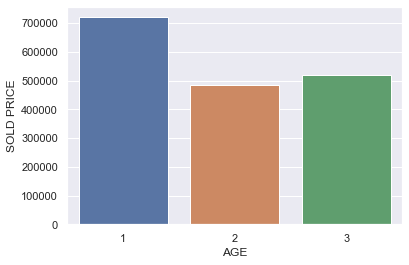

In [66]:
sn.barplot(x = 'AGE', y = 'SOLD PRICE', data = soldprice_by_age); 

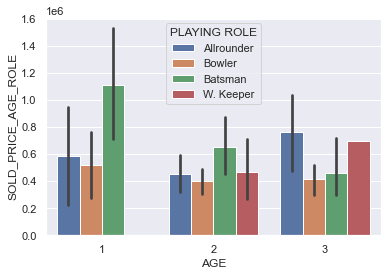

In [67]:
sn.barplot(x = 'AGE', y = 'SOLD_PRICE_AGE_ROLE', hue = 'PLAYING ROLE', data = soldprice_comparison);

Histogram-For sold price

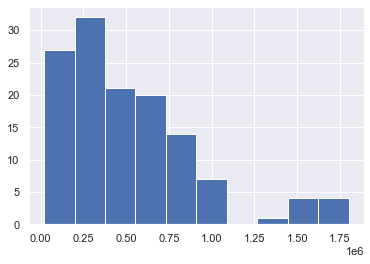

In [68]:
plt.hist( df_ipl_auction_data['SOLD PRICE'] ); 

(array([16., 11., 16., 16.,  9., 12.,  5., 15.,  8.,  6.,  6.,  1.,  0.,
         0.,  1.,  0.,  1.,  3.,  0.,  4.]),
 array([  20000.,  109000.,  198000.,  287000.,  376000.,  465000.,
         554000.,  643000.,  732000.,  821000.,  910000.,  999000.,
        1088000., 1177000., 1266000., 1355000., 1444000., 1533000.,
        1622000., 1711000., 1800000.]),
 <BarContainer object of 20 artists>)

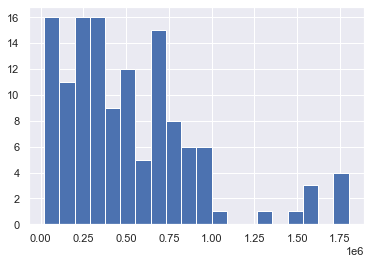

In [69]:
plt.hist( df_ipl_auction_data['SOLD PRICE'], bins = 20 )

 Distribution or Density plot


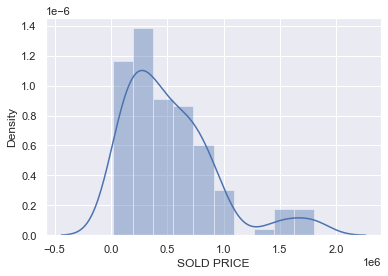

In [70]:
sn.distplot( df_ipl_auction_data['SOLD PRICE']); 

 Box Plot


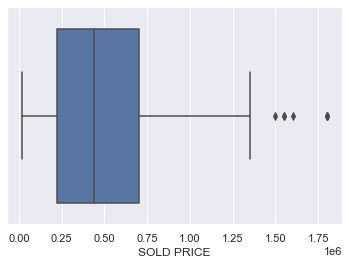

In [71]:
box = sn.boxplot(df_ipl_auction_data['SOLD PRICE']); 

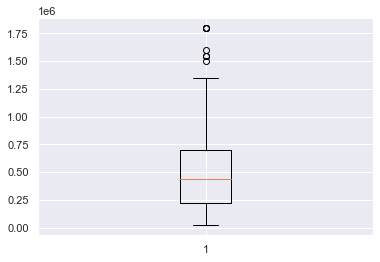

In [72]:
box = plt.boxplot(df_ipl_auction_data['SOLD PRICE']); 

In [73]:
[item.get_ydata()[0] for item in box['caps']]

[20000, 1350000]

In [74]:
[item.get_ydata()[0] for item in box['whiskers']] 

[225000.0, 700000.0]

In [75]:
[item.get_ydata()[0] for item in box['medians']]

[437500.0]

OUTLIERS

In [77]:
df_ipl_auction_data[df_ipl_auction_data['SOLD PRICE'] > 1350000.0][['PLAYER NAME', 'PLAYING ROLE', 'SOLD PRICE']] 

,PLAYER NAME,PLAYING ROLE,SOLD PRICE
15,"Dhoni, MS",W. Keeper,1500000
23,"Flintoff, A",Allrounder,1550000
50,"Kohli, V",Batsman,1800000
83,"Pietersen, KP",Batsman,1550000
93,"Sehwag, V",Batsman,1800000
111,"Tendulkar, SR",Batsman,1800000
113,"Tiwary, SS",Batsman,1600000
127,Yuvraj Singh,Batsman,1800000


 Comparing Distributions
 
 Using distribution plots



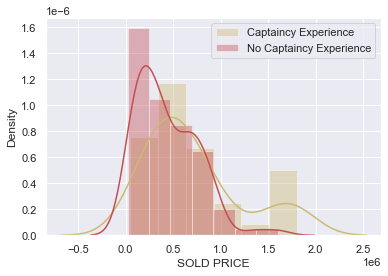

In [78]:
sn.distplot( df_ipl_auction_data[df_ipl_auction_data['CAPTAINCY EXP'] == 1]['SOLD PRICE'], color = 'y', label = 'Captaincy Experience') 
sn.distplot( df_ipl_auction_data[df_ipl_auction_data['CAPTAINCY EXP'] == 0]['SOLD PRICE'], color = 'r',  label = 'No Captaincy Experience'); 
plt.legend(); 

Comparison using Box plots

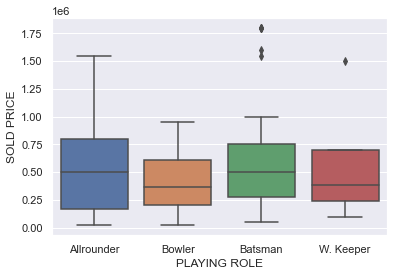

In [79]:
sn.boxplot(x = 'PLAYING ROLE', y = 'SOLD PRICE', data = df_ipl_auction_data);

Scatter Plot:

In [80]:
ipl_batsman_df = df_ipl_auction_data[df_ipl_auction_data['PLAYING ROLE'] == 'Batsman'] 

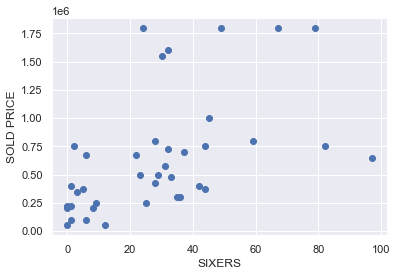

In [81]:
plt.scatter(x = ipl_batsman_df.SIXERS, y = ipl_batsman_df['SOLD PRICE']); 
plt.xlabel('SIXERS') 
plt.ylabel('SOLD PRICE');

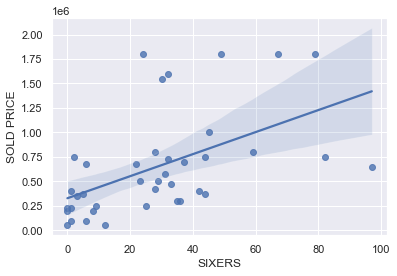

In [82]:
sn.regplot( x = 'SIXERS', y = 'SOLD PRICE',  data = ipl_batsman_df );

 Pair Plot


In [83]:
influential_features = ['SR-B', 'AVE', 'SIXERS', 'SOLD PRICE'] 

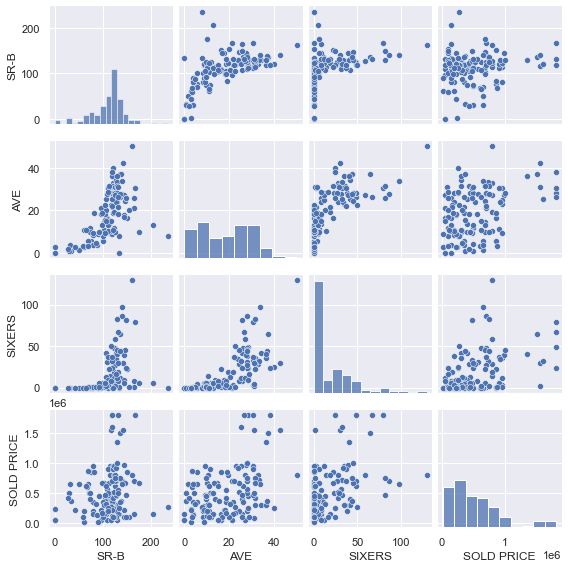

In [84]:
sn.pairplot(df_ipl_auction_data[influential_features], size=2)

### Correlations and Heatmaps


In [86]:
df_ipl_auction_data[influential_features].corr() 

,SR-B,AVE,SIXERS,SOLD PRICE
SR-B,1.000,0.584,0.425,0.184
AVE,0.584,1.000,0.705,0.397
SIXERS,0.425,0.705,1.000,0.451
SOLD PRICE,0.184,0.397,0.451,1.000


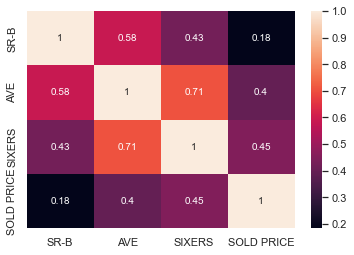

In [87]:
sn.heatmap(df_ipl_auction_data[influential_features].corr(), annot=True); 